In [1]:
# !pip install psycopg2

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine


In [3]:
# Connect to the database
engine = create_engine(f"postgresql://postgres:<passwordhere>@localhost:5432/Employees")
conn = engine.connect()

In [4]:
# Create Data Frames
salaries_df = pd.read_sql('SELECT * FROM salaries', conn)
titles_df   = pd.read_sql('SELECT * FROM titles',   conn)

In [5]:
# Drop Dates
salaries_df = salaries_df.drop(columns = ["from_date", "to_date"])
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
# Drop Dates
titles_df = titles_df.drop(columns = ["from_date", "to_date"])
titles_df.head()

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer


In [7]:
# Merge Data
merged_df = pd.merge(salaries_df, titles_df, on="emp_no", how="inner")
merged_df.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer


In [8]:
# Group by Title
title_group_df = merged_df.groupby("title")
title_group_df.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer
5,10005,78228,Senior Staff
6,10005,78228,Staff
7,10006,40000,Senior Engineer
8,10007,56724,Senior Staff
9,10007,56724,Staff


In [9]:
# create a variable for histogram
salary_hist = merged_df["salary"]
salary_hist

0         60117
1         65828
2         40006
3         40054
4         40054
          ...  
443303    49597
443304    49597
443305    40000
443306    40000
443307    63707
Name: salary, Length: 443308, dtype: int64

Text(0.5, 1.0, 'Most Common Salary Ranges for Employees (USD)')

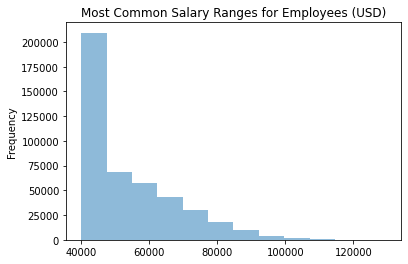

In [10]:
# Plot Histogram to visualize the most common salary ranges for employees
salary_hist.plot.hist(bins=12, alpha=0.5)
plt.title('Most Common Salary Ranges for Employees (USD)')


In [11]:
avg_salary_title = title_group_df.mean()["salary"]
avg_salary_title

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

Text(0.5, 1.0, 'Average Salary by Title (USD)')

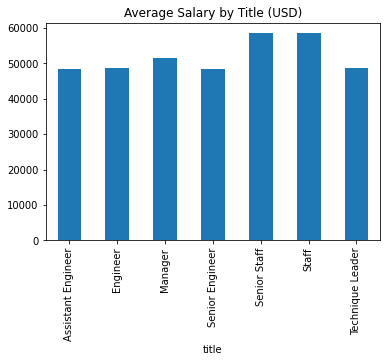

In [12]:
avg_salary_title.plot.bar()
plt.title('Average Salary by Title (USD)')
